## Лабораторна робота 3. Побудова автокодувальника
### Завдання 1.2
### Блінда Ірина ФІТ 4-4

Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Завантаження та підготовка даних
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
# Архітектура енкодера
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [4]:
# Архітектура декодера
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Навчання автокодувальника
history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.2997 - val_loss: 0.1493
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.1452 - val_loss: 0.1321
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.1306 - val_loss: 0.1223
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.1220 - val_loss: 0.1167
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1173 - val_loss: 0.1127
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.1134 - val_loss: 0.1100
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1110 - val_loss: 0.1078
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.1086 - val_loss: 0.1063
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.1072 - val_loss: 0.1047
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1057 - val_loss: 0.1035
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.1047 - val_loss: 0.1027
Epoch 12/20
469/469 ━━━━━━━━━━

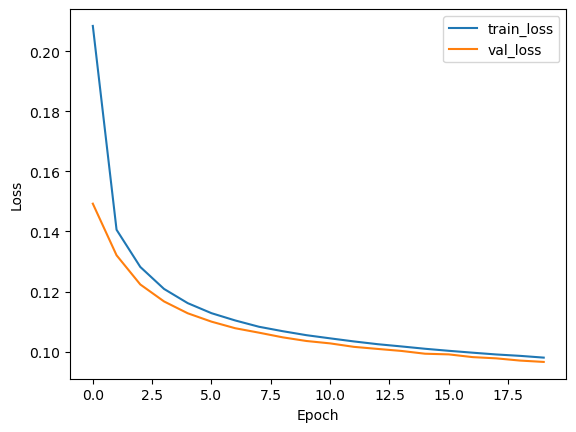

In [6]:
# Графік функції втрат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [7]:
# Візуалізація результатів
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


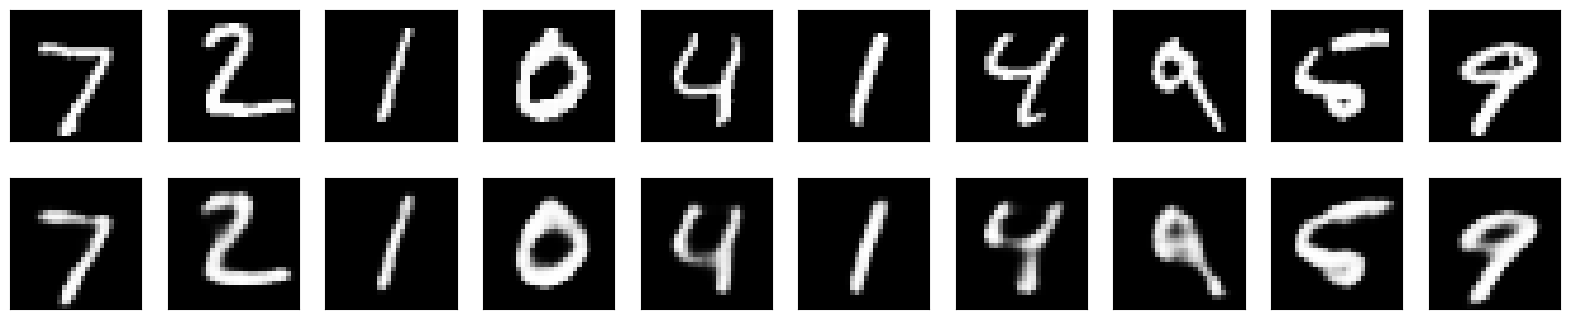

In [8]:
n = 10  # Кількість зображень, які будуть виведені
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відновлені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Висновок

У цьому дослідженні ми створили звичайний автоенкодер для набору даних MNIST, використовуючи згорткову модель на базі TensorFlow. Ми розробили просту архітектуру автоенкодера, що складається з енкодера та декодера з використанням згорткових шарів. Для активації функцій використовувалася ReLU, а для визначення втрат - середньоквадратична помилка (MSE).

Після навчання автоенкодера протягом 20 епох ми отримали модель, яка успішно відновлює зображення з датасету MNIST. Графіки функції втрат дозволили відстежити динаміку втрат під час тренування моделі.

Візуалізація результатів показала ефективність роботи автоенкодера у відновленні оригінальних зображень з датасету MNIST. Це свідчить про його здатність витягувати корисні ознаки з даних та відновлювати вхідні зображення. Такий підхід може бути корисним для автоматизованого аналізу даних та обробки зображень.